## Transformers and Attention Mechanism 

**Instructor : Jason Lin and Brian Cruz**

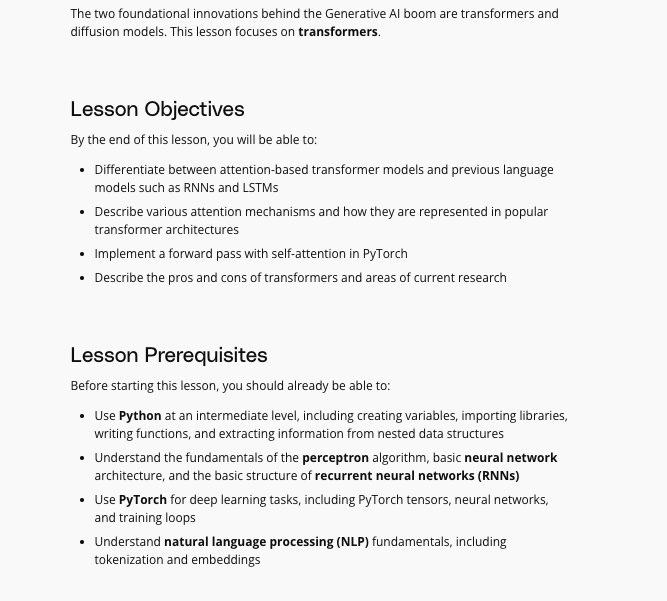

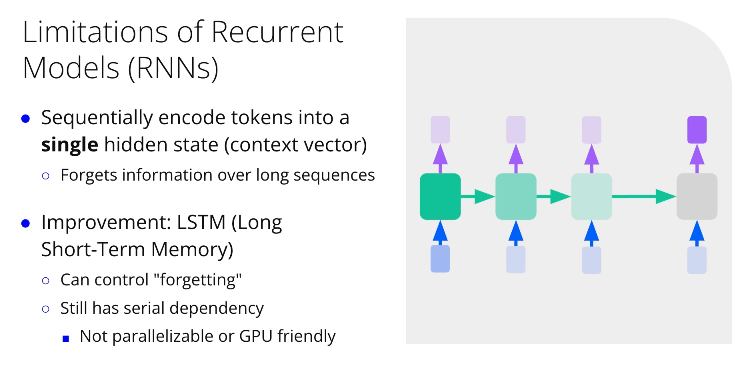

<p align="center">
  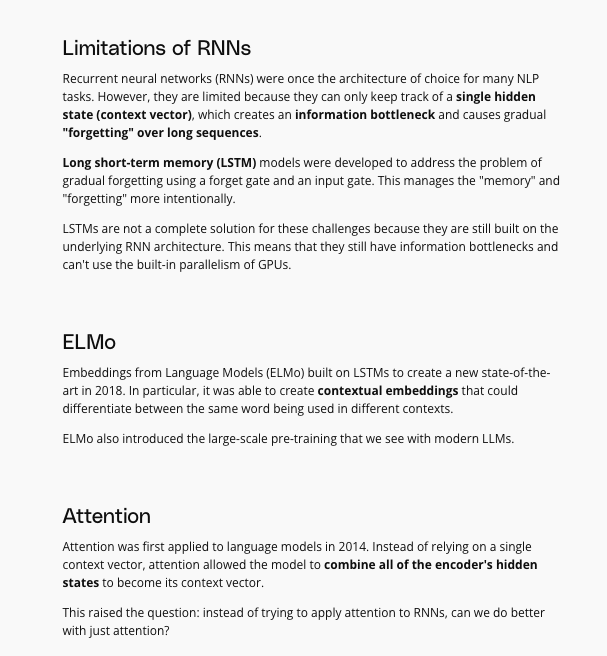
  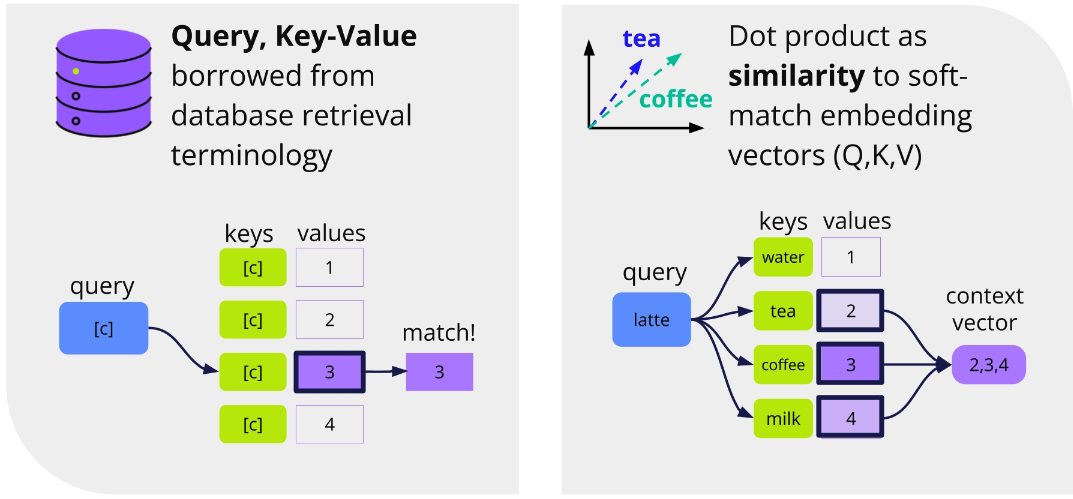
  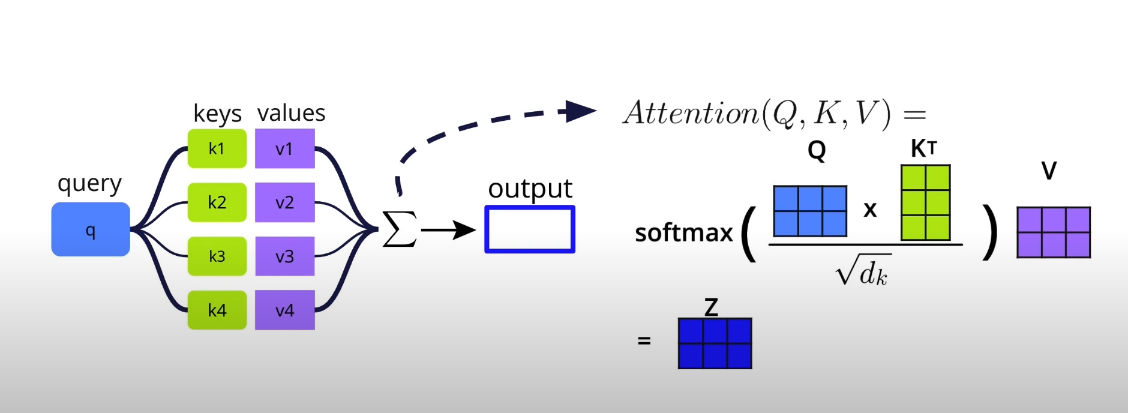
</p>

<p align="center">
  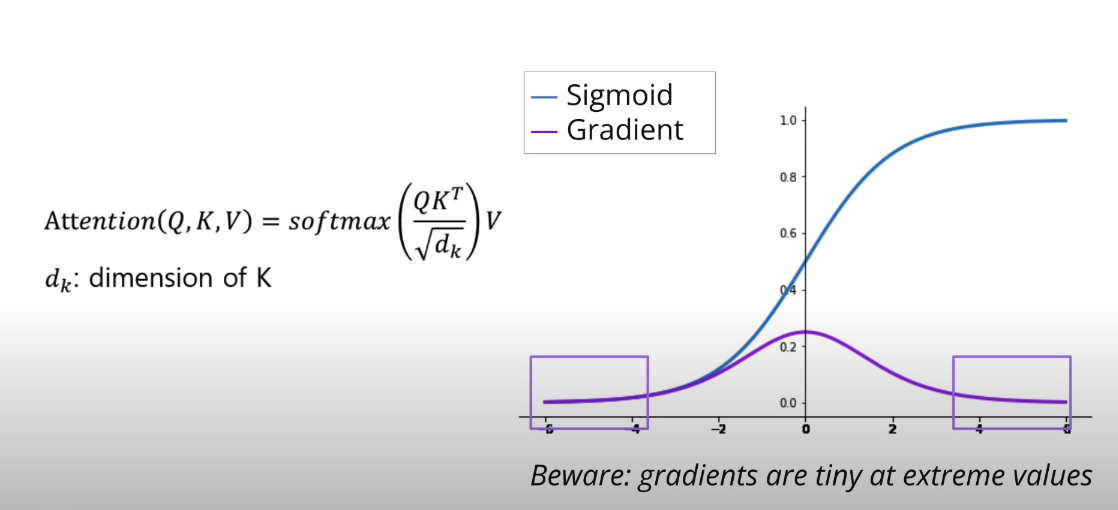
  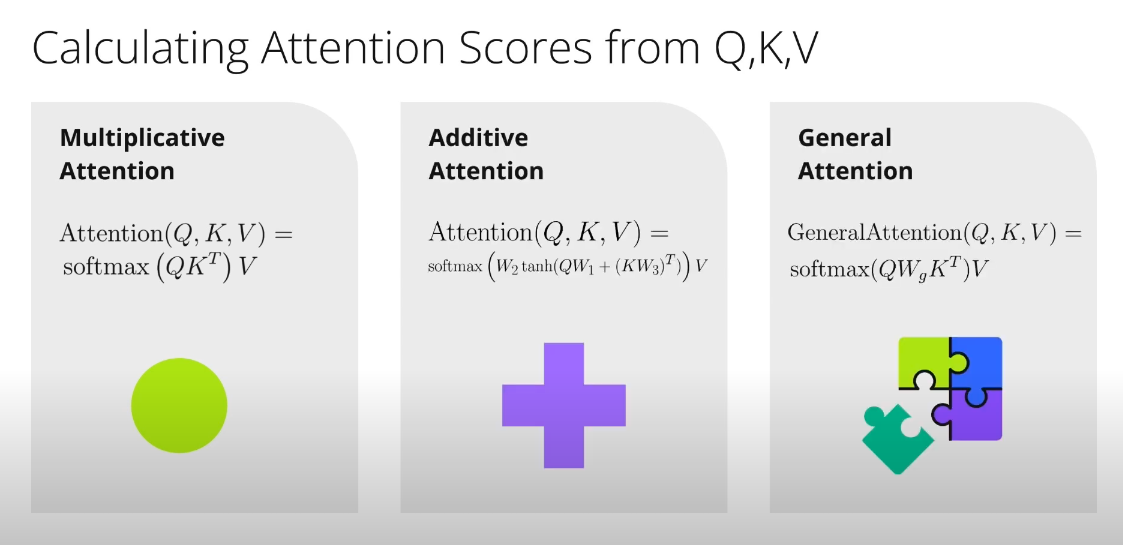
  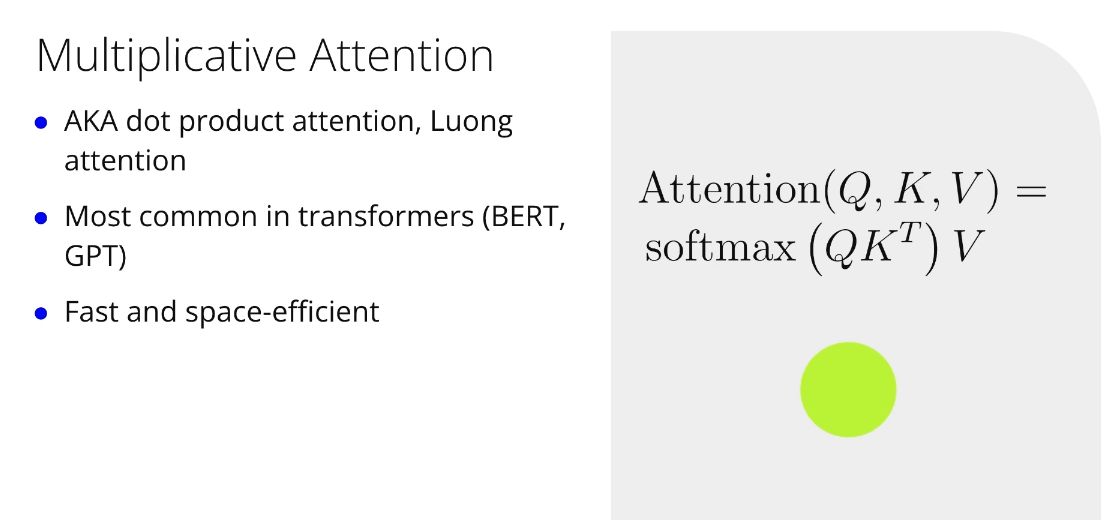
</p>

<p align="center">
  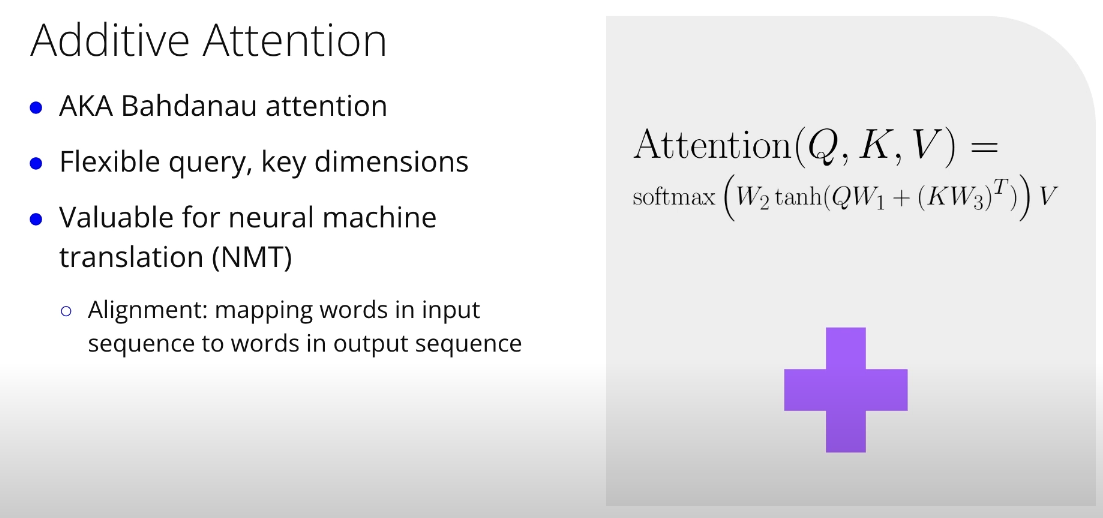
  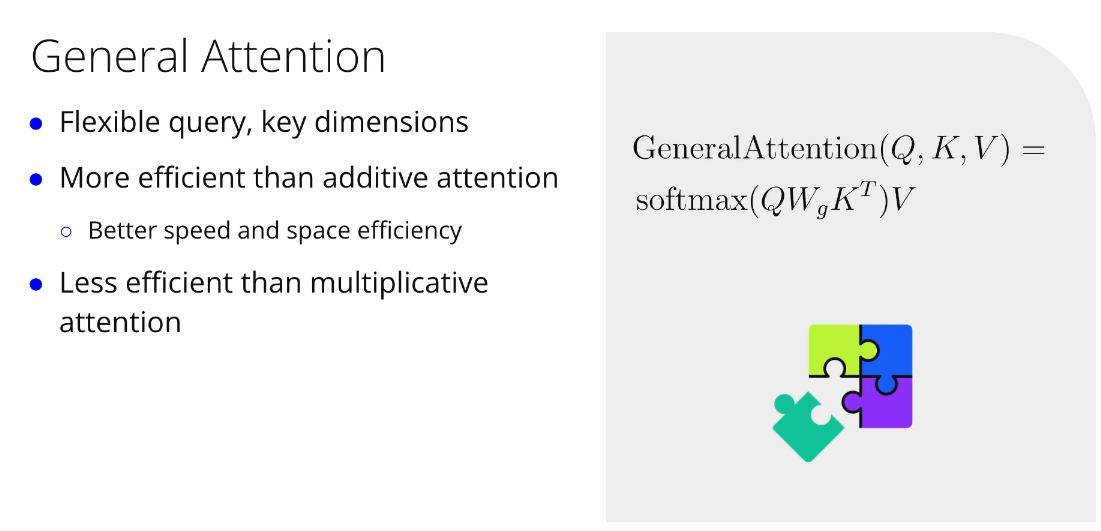
  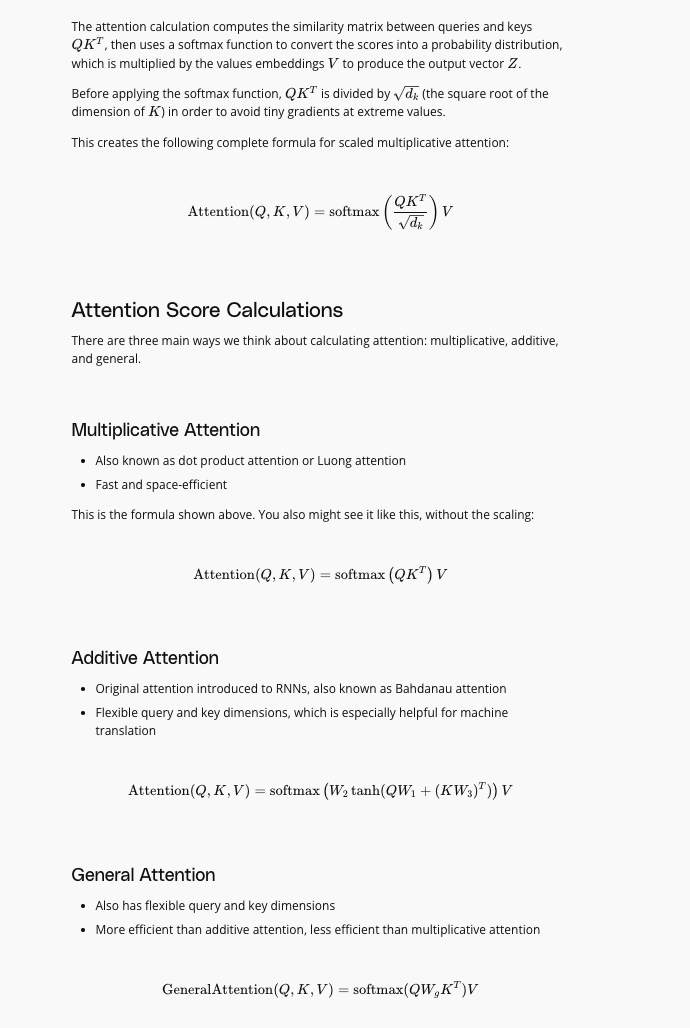
  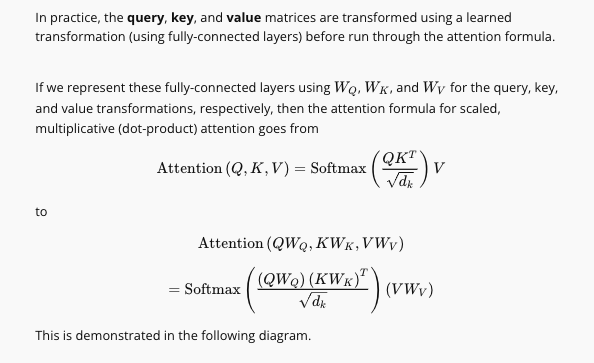
</p>



For self-attention, the Q, K, and V matrices are actually identical. For self-attention, they are obtained from token embeddings, which are the output of the previous neural network layer.

<p align="center">
  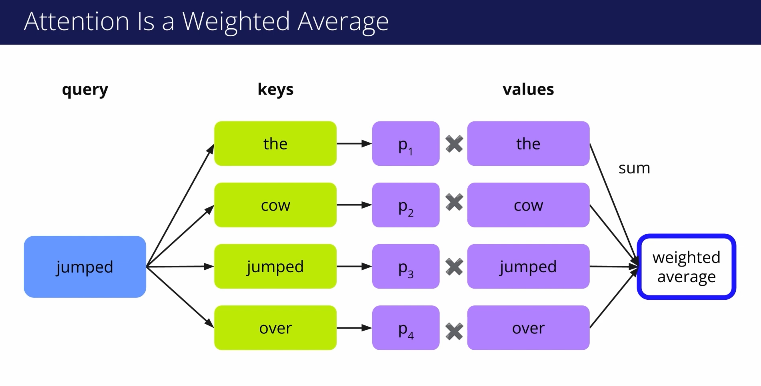
  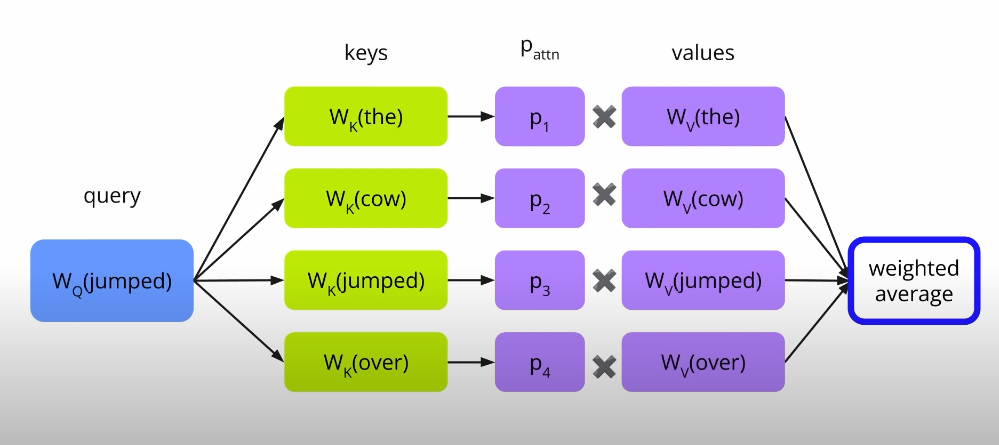
  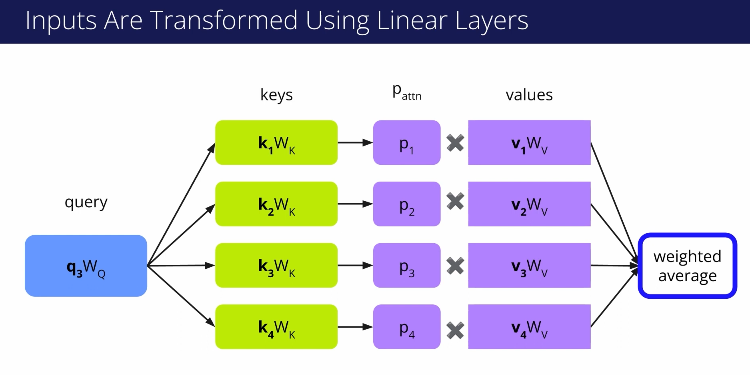
</p>

<p align="center">
  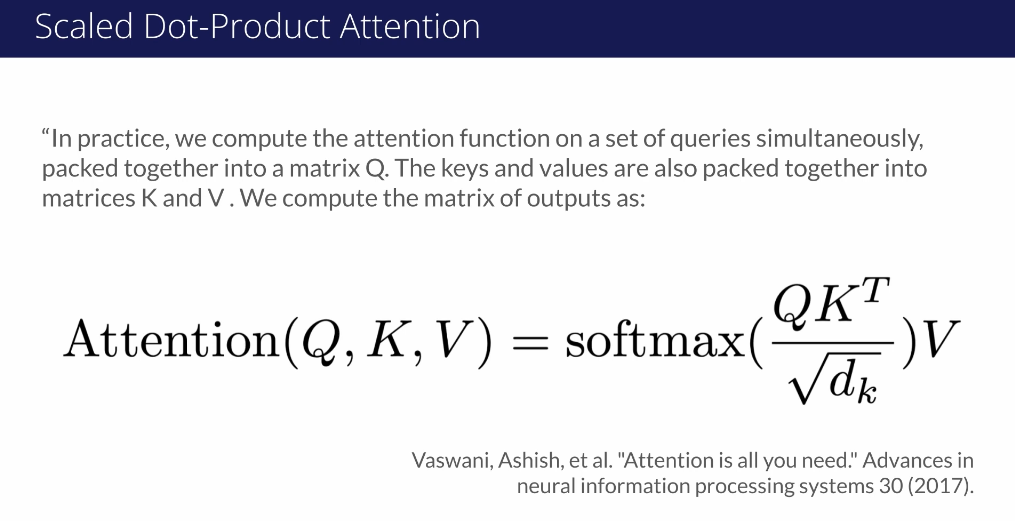
  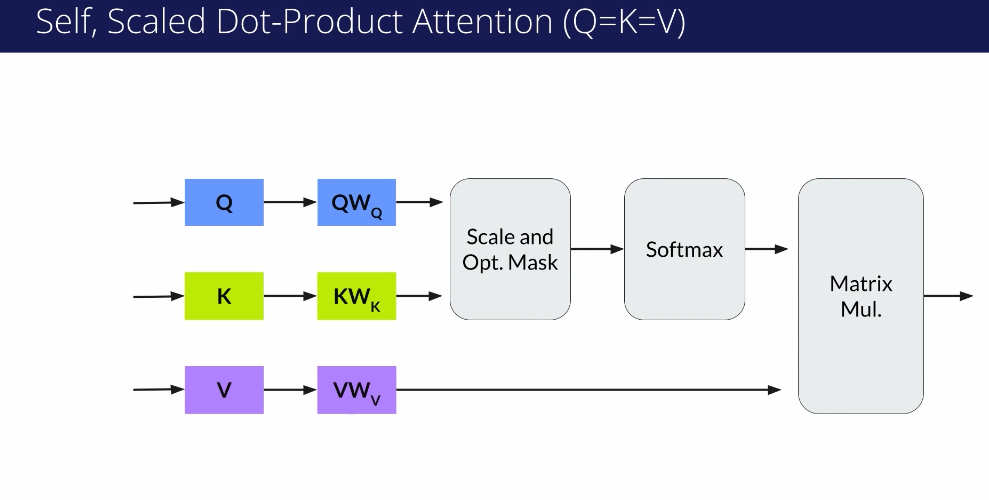
  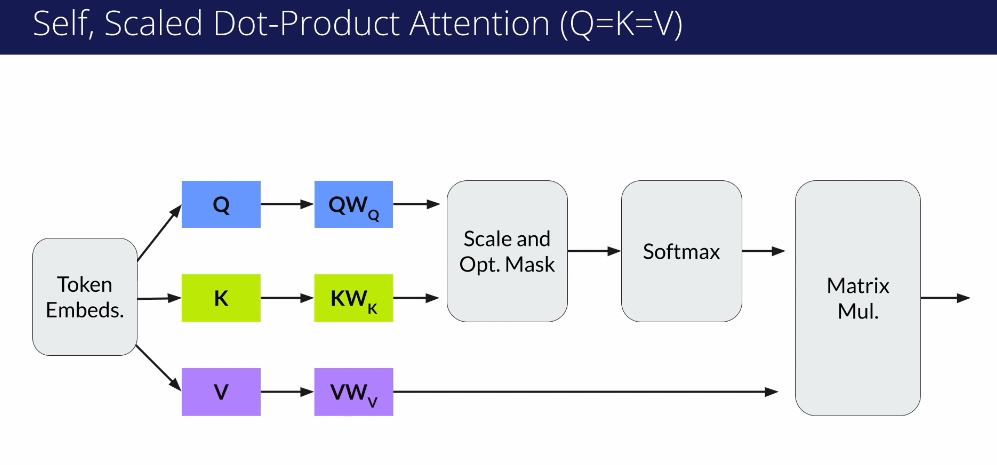
</p>


## Attention Mechanisms

__In self attension Q=K=V__

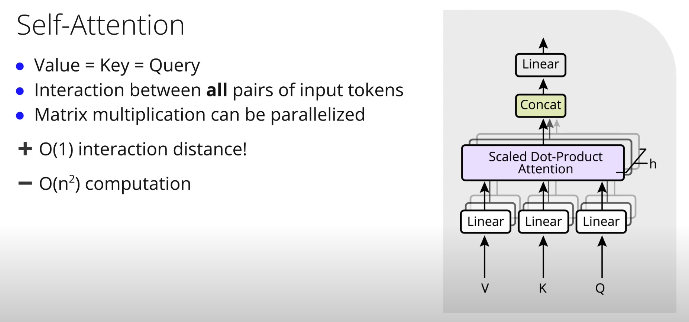
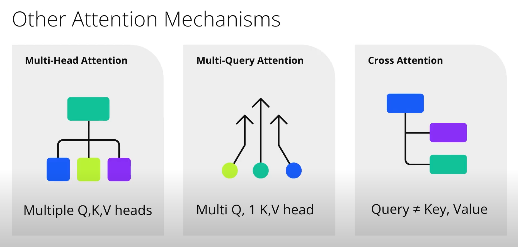 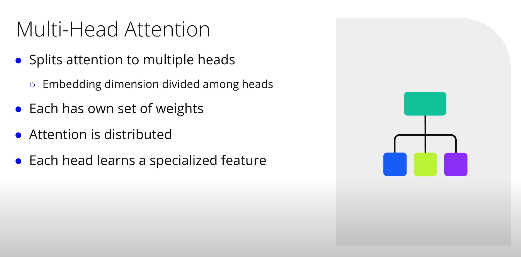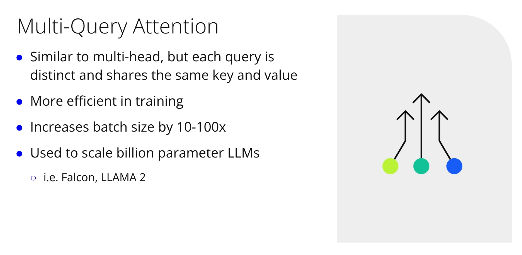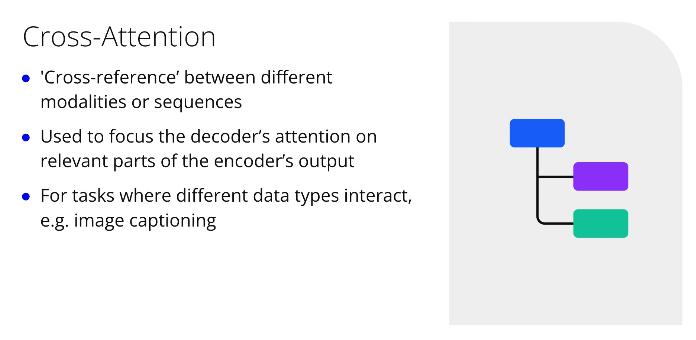

#### Can Self attension replace RNN ? Nor really because self attension also have below problems
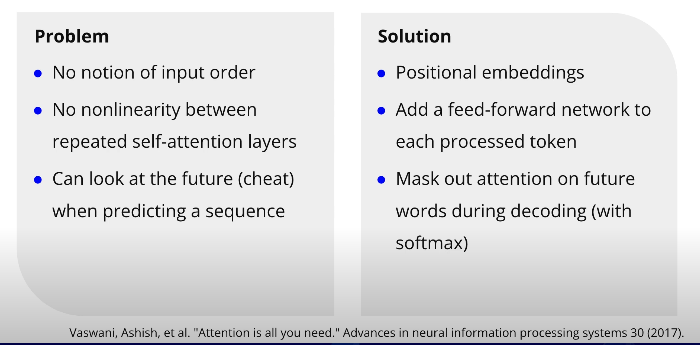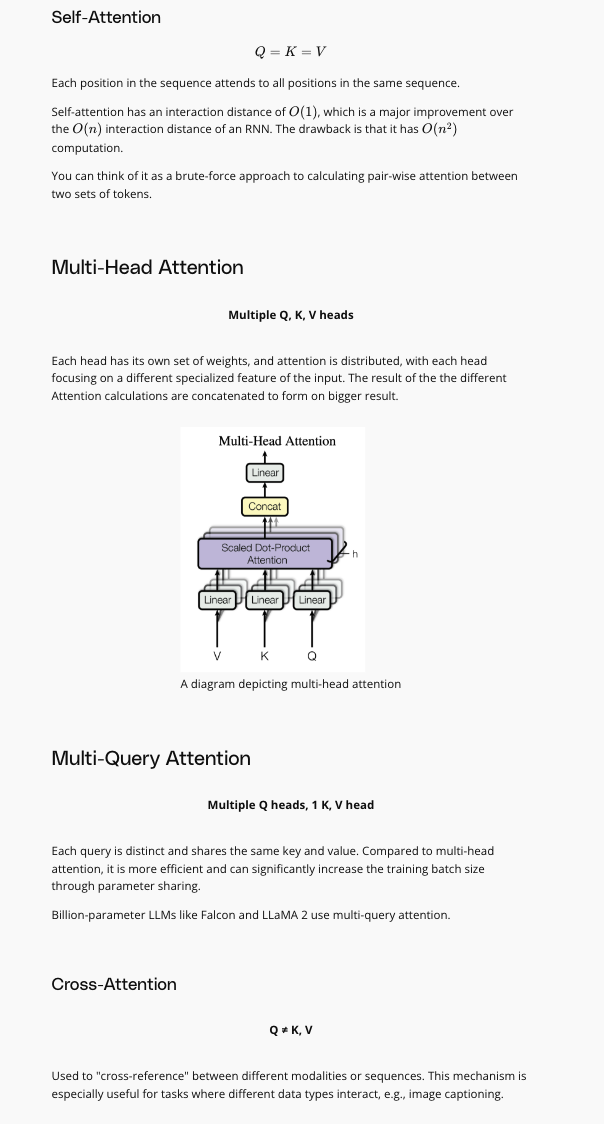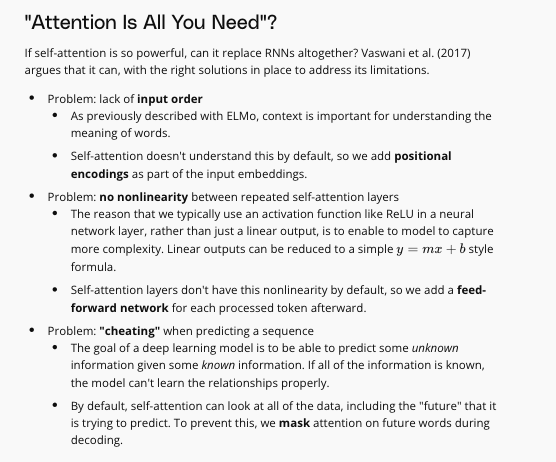

__The primary advantage of self-attention mechanisms is their ability to directly model relationships between all elements in the input sequence, regardless of their position. This allows for a more flexible and comprehensive understanding of the sequence as a whole.__

# Demo: Using BertViz To Detect Bias

Auto-regressive models trained on data created by human beings (e.g., data from the internet) will exhibit many of the same biases of those human beings. Thus, being able to visualize what's happening inside transformers is important to understanding this bias. One tool for visualizing attention is [BertViz](https://github.com/jessevig/bertviz?tab=readme-ov-file#self-attention-models-bert-gpt-2-etc).

## The doctor asked the nurse...

Two sentences are run through the auto-regressive GPT2 model:

* "The doctor asked the nurse a question. She"
* "The doctor asked the nurse a question. He"

We notice that the attention head #10 in the 5th layer shows the pronouns "She" and "He" attending to the words "nurse" and "doctor", respectively.

In [1]:
from transformers import AutoModel, AutoTokenizer, utils

utils.logging.set_verbosity_error()  # Suppress standard warnings

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModel.from_pretrained("gpt2", output_attentions=True)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [3]:
pip install bertviz

  Using cached sentencepiece-0.2.0-cp38-cp38-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.5 MB/s eta 0:00:00 0:00:01
Using cached sentencepiece-0.2.0-cp38-cp38-macosx_11_0_arm64.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 4.7 MB/s eta 0:00:0000:0100:01
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
ERROR: pip's dependency resolver does not currently take into account a

In [5]:
from bertviz import head_view

inputs = tokenizer.encode(
    "The doctor asked the nurse a question. She", return_tensors="pt"
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

In [6]:
inputs = tokenizer.encode(
    "The doctor asked the nurse a question. He", return_tensors="pt"
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

## The teacher asked the inspector...

A similar analysis on the following two sentences can be made:

* "The teacher asked the inspector if the school was structurally sound. He"
* "The teacher asked the inspector if the school was structurally sound. She"

In this case, the attention mechanism shows "He" attending to both teacher and inspector more or less equally but "She" attends to "teacher" disproportionately.

In [8]:
inputs = tokenizer.encode(
    "The teacher asked the inspector if the school was structurally sound. He",
    return_tensors="pt",
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

In [9]:
inputs = tokenizer.encode(
    "The teacher asked the inspector if the school was structurally sound. She",
    return_tensors="pt",
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

Useful Links:
* [BertViz Website](https://github.com/jessevig/bertviz)
* [BertViz Paper](https://aclanthology.org/P19-3007.pdf)
* [BertViz Colab Tutorial](https://colab.research.google.com/drive/1hXIQ77A4TYS4y3UthWF-Ci7V7vVUoxmQ?usp=sharing)

#### implement the scaled multiplicative attention calculation used by the multi-head attention class used in GPT models.

# Exercise: Train your own transformer!

In this exercise you will be implementing the `forward()` function of the `MultiHeadSelfAttention` module in a minified GPT implementation. GPT refers to the "Generative Pre-trained Transformers" from OpenAI, originally described in ["Improving language understanding with unsupervised learning"](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf). This specific GPT implementation is heavily inspired by the [minGPT implementation](https://github.com/karpathy/minGPT) provided by [Andrej Karpathy](https://github.com/karpathy/).


Let's dive into the `MultiHeadSelfAttention` module, which is central to the overall GPT model.

## Scaled Multiplicative Attention

Recall this attention formula:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

This is represented in the Python code as follows:

* $Q$: `q`
* $K$: `k`
* $V$: `v`
* $\text{softmax}$: `F.softmax()`
* $K^T$: `k_t`
* $QK^T$ (matrix multiplication): `q @ k_t`
* $\sqrt{}$: `math.sqrt()`
* $d_k$: `d_k`

## Your Task: Complete the MultiHeadSelfAttention class

Within the `MultiHeadSelfAttention` class, fill in the parts marked `TODO` within the between the lines marked `EXERCISE START` and `EXERCISE END`.

Please also take the opportunity to read through the class to understand its components.

In [13]:
import math

import torch
import torch.nn as nn
from torch.nn import functional as F


class MultiHeadSelfAttention(nn.Module):
    """A vanilla multi-head masked self-attention layer."""

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0

        # key, query, value projections for all heads
        self.key = nn.Linear(config.n_embd, config.n_embd)
        self.query = nn.Linear(config.n_embd, config.n_embd)
        self.value = nn.Linear(config.n_embd, config.n_embd)

        # regularization
        self.attn_drop = nn.Dropout(config.attn_pdrop)
        self.resid_drop = nn.Dropout(config.resid_pdrop)

        # output projection
        self.proj = nn.Linear(config.n_embd, config.n_embd)

        # causal mask to ensure that attention is only applied to the left in the input sequence
        self.register_buffer(
            "mask",
            torch.tril(torch.ones(config.block_size, config.block_size)).view(
                1, 1, config.block_size, config.block_size
            ),
        )
        self.n_head = config.n_head

    def forward(self, x):
        """The forward pass for the multi-head masked self-attention layer.

        In this exercise, we include lots of print statements and checks to help you
        understand the code and the shapes of the tensors. When actually training
        such a model you would not log this information to the console.
        """

        # batch size, sequence length (in tokens), embedding dimensionality (n_embd per token)
        B, T, C = x.size()
        hs = C // self.n_head  # head size

        # print some debug information
        print(f"batch size: {B}")
        print(f"sequence length: {T}")
        print(f"embedding dimensionality: {C}")
        print(f"number of heads: {self.n_head}")
        print(f"head size: {hs}")

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # resulting dims for k, q, and v are (B, n_head, T, hs)
        k = self.key(x).view(B, T, self.n_head, hs).transpose(1, 2)
        q = self.query(x).view(B, T, self.n_head, hs).transpose(1, 2)
        v = self.value(x).view(B, T, self.n_head, hs).transpose(1, 2)

        # === EXERCISE START: IMPLEMENT THE MULTI-HEAD ATTENTION ===

        #######################################################################
        # TODO: multiply q and k_t matrices, then divide by the square root of d_k
        print("=== Calculate MatrixMultiplication(Q, K_T) / sqrt(d_k) ===")

        k_t = k.transpose(-2, -1)  # what is the shape of k_t?
        d_k = k.size(-1)

        # Matrix multiplication (hint: not "*")
        # att = <TODO>
        att = q @ k_t / math.sqrt(d_k)  # Solution

        print(f"q.shape: {q.shape}")
        print(f"k_t.shape: {k_t.shape}")
        print(f"d_k: {d_k}")
        print(f"att.shape: {att.shape}")

        #######################################################################
        # TODO: set the mask fill value to negative infinity
        print("=== Apply the attention mask ===")

        # masked_fill_value = <TODO>
        masked_fill_value = float("-inf")  # Solution

        att = att.masked_fill(self.mask[:, :, :T, :T] == 0, masked_fill_value)

        # Show the result of applying the mask
        print(f"att: {att}")

        #######################################################################
        # TODO: apply softmax
        print("=== Softmax ===")

        # att = F.softmax(att, dim=<TODO>)
        att = F.softmax(att, dim=-1)  # Solution

        att = self.attn_drop(att)

        # Show the result of applying the softmax and check that
        # the sum of the attention weights in each row is 1
        print(f"att.shape: {att.shape}")
        print(f"att: {att}")
        print(f"att.sum(dim=-1): {att.sum(dim=-1)}")
        att_rows_sum_to_one = all(
            ((att.sum(dim=-1) - 1.0) ** 2 < 1e-6).flatten().tolist()
        )
        print(f"att_rows_sum_to_one: {att_rows_sum_to_one}")
        if not att_rows_sum_to_one:
            raise ValueError(
                "Attention weight rows do not sum to 1. Perhaps the softmax dimension or masked_fill_value is not correct?"
            )

        ######################################################################
        # TODO: multiply att and v matrices
        # (B, n_head, T, T) x (B, n_head, T, hs) -> (B, n_head, T, hs)
        print("=== Calculate final attention ===")

        # y = <TODO>
        y = att @ v  # Solution

        print(f"y.shape: {y.shape}")

        ######################################################################

        # === EXERCISE END: IMPLEMENT THE MULTI-HEAD ATTENTION ===

        # re-assemble all head outputs side by side
        y = y.transpose(1, 2).contiguous().view(B, T, C)

        # output projection
        y = self.resid_drop(self.proj(y))
        return y

**Let's check the implementation.** No modifications are needed for the next cell. Please run it as is.

In [14]:
class GPTConfig:
    vocab_size = 11
    block_size = 5
    # n_layer = 1  # not used in this exercise
    n_head = 4
    n_embd = 12

    attn_pdrop = 0.0
    resid_pdrop = 0.0


# set pytorch seed for reproducibility
attention = MultiHeadSelfAttention(GPTConfig())
x = torch.tensor(
    [
        [
            # 12-dimensional embeddings (4 heads @ 3 dim. each) for each of 5 tokens
            [1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        ]
    ]
)

# Set all parameters to 0.1
for weight in attention.parameters():
    nn.init.constant_(weight, 0.1)

# Set the model to evaluation mode to disable dropout
# attention.eval()

# Perform a forward pass
y = attention(x)

# Check that the output shape is correct
assert y.shape == x.shape


print("=== Showing the input and output ===")
print(x)
print(y)


print("=== Checking gradients ===")

loss = y.sum()
loss.backward()

# check if nan in y
if torch.isnan(y).any().item():
    raise ValueError(
        "It appears that the output contains NaNs. Perhaps the softmax dimension is incorrect?"
    )

gradients = [
    int((attention.query.weight.grad**2).sum().item()),
    int((attention.query.bias.grad**2).sum().item()),
    int((attention.key.weight.grad**2).sum().item()),
    int((attention.key.bias.grad**2).sum().item()),
    int((attention.value.weight.grad**2).sum().item()),
    int((attention.value.bias.grad**2).sum().item()),
]

print("Gradients:", gradients)
if gradients == [161, 13, 294, 0, 37187, 432]:
    print("Success! 🚀🚀🚀")
elif gradients == [1, 0, 2, 0, 38787, 432]:
    raise RuntimeError(
        "There is an error in your implementation. Please check your code. Did you remember to divide by the square root of d_k?"
    )
elif gradients[-1] == 432:
    raise RuntimeError(
        "There is an error in your implementation. Please check your code. Did you use -inf as the masked_fill_value?"
    )
else:
    raise RuntimeError(
        "There is an error in your implementation. Please check your code."
    )

batch size: 1
sequence length: 5
embedding dimensionality: 12
number of heads: 4
head size: 3
=== Calculate MatrixMultiplication(Q, K_T) / sqrt(d_k) ===
q.shape: torch.Size([1, 4, 5, 3])
k_t.shape: torch.Size([1, 4, 3, 5])
d_k: 3
att.shape: torch.Size([1, 4, 5, 5])
=== Apply the attention mask ===
att: tensor([[[[16.6450,    -inf,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,  2.9272]],

         [[16.6450,    -inf,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,  2.9272]],

         [[16.6450,    -inf,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,    -inf,    -inf,    -inf],
        

### Transformers

Now that we have discussed attention mechanisms, we can get into the details of how the transformer architecture works!

Keep in mind that the original transformer from Vaswani et al. (2017) had both an encoder and a decoder, but that newer transformer-based models often use just the encoder or just the decoder portion. For instance, the GPT models are decoder transformer models.


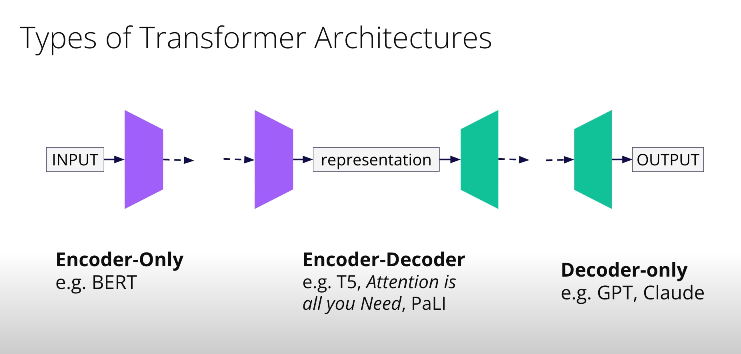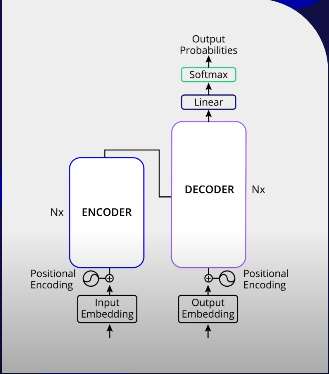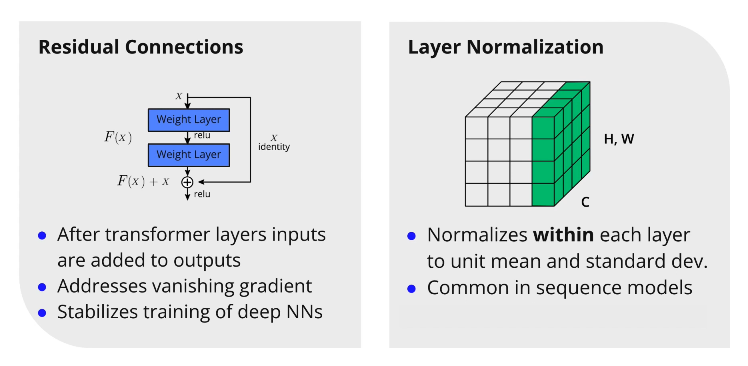

#### ARCHITECTURE OF TRANSFORMER

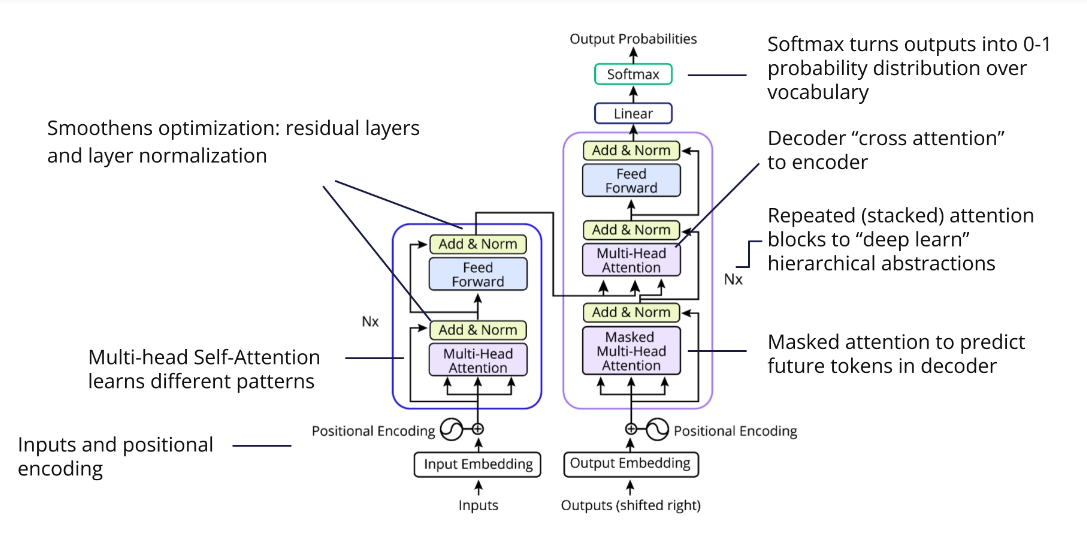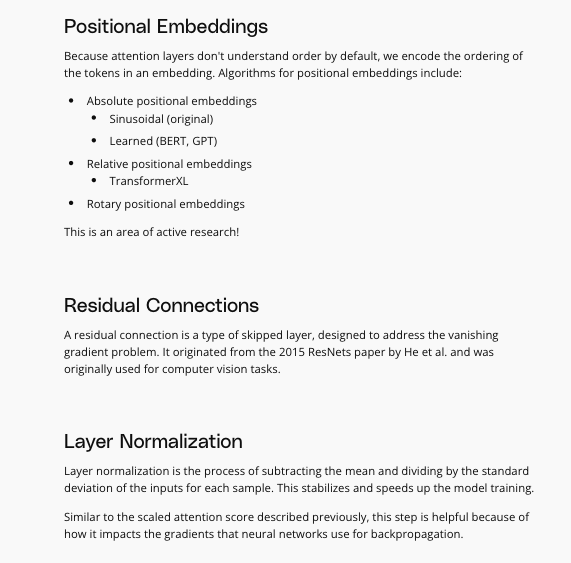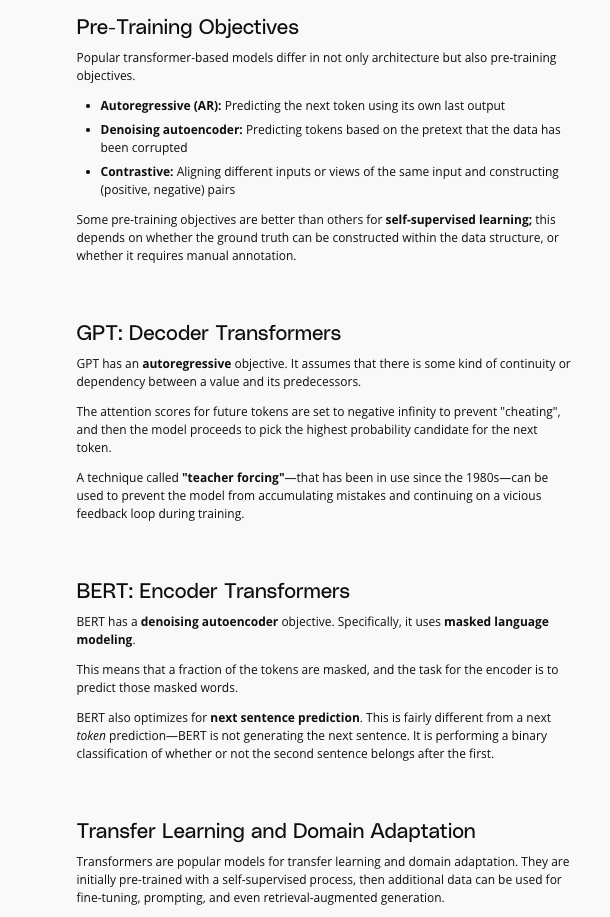

### Training transformer Based Models

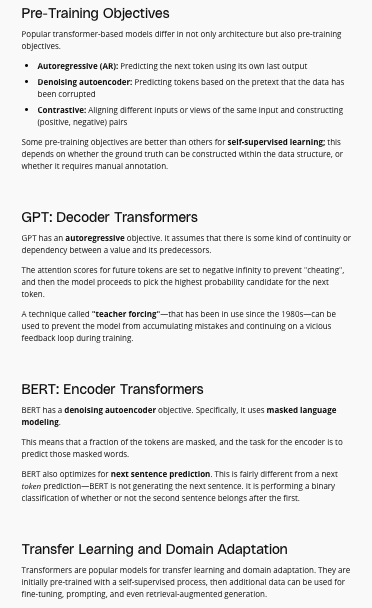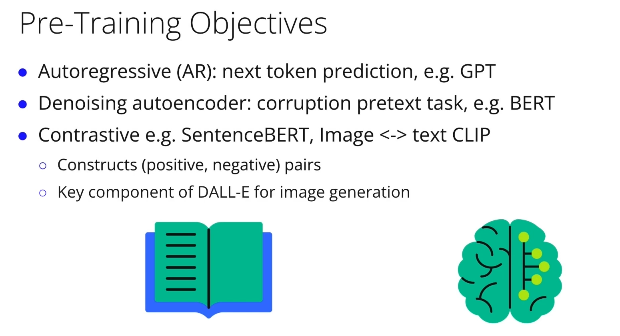

#### Let's see an example of the GPT (Generative Pre-Trained Transformer) which is an autoregressive model which means that it predicts the next token by previous outputs so far. In the below example the hight probability is there for moon so it will consider the moon as next word.
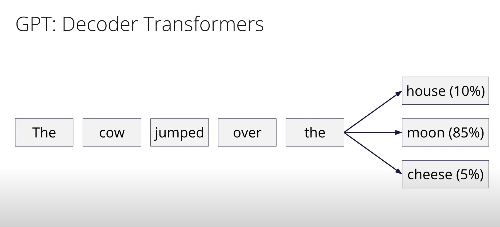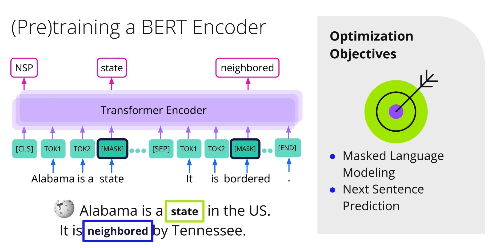
#### The BERT(Birectional Encoding Representation from Transformers) are example of denoising autoemcoder objective. It uses the masked language modeling along with the next sentence prediction.

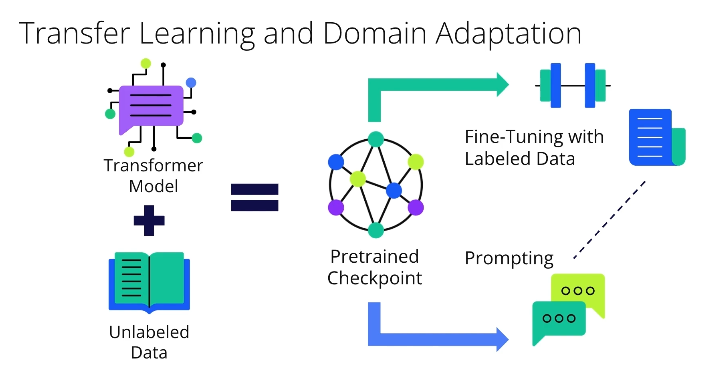

BERT's pre-training objective makes it well-suited for downstream NLP tasks like sentiment analysis, text classification, paraphrase detection, and named entity recognition

### Create Your Own GPT Model

## Train your own transformer!

In this exercise, we will construct and train a minified GPT implementation. GPT refers to the "Generative Pre-trained Transformers" from OpenAI, originally described in ["Improving language understanding with unsupervised learning"](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf). This specific GPT implementation is heavily inspired by the [minGPT implementation](https://github.com/karpathy/minGPT) provided by [Andrej Karpathy](https://github.com/karpathy/).

There are three important PyTorch modules here:
* `MultiHeadSelfAttention`: a self-attention implementation which will be provided for you;
* `Block`: a transformer block which is repeated n_layer times in a GPT model;
* `GPT`: the full GPT model itself, including intial embeddings, the GPT blocks, and the token decoding logic.


The `GPT` module uses the `Block` module, which in turn uses the `MultiHeadSelfAttention` module.
```                                   
    ┌────────────────────────┐     
    │          GPT           │     
    └────────────────────────┘     
                ▲                  
    ┌───────────┴────────────┐     
    │         Block          │     
    └────────────────────────┘     
                ▲                  
    ┌───────────┴────────────┐     
    │ MultiHeadSelfAttention │     
    └────────────────────────┘     


In [1]:
## Step: Import and show MultiHeadSelfAttention
# common is a python file, which is present in the same folder 

from common import GPTConfig, MultiHeadSelfAttention

# Let's use a placeholder config to show how the attention layer works
config = GPTConfig(
    vocab_size=10,
    n_layer=3,
    n_embd=12,
    n_head=4,
    block_size=5,
)

attention = MultiHeadSelfAttention(config)

print(attention)

MultiHeadSelfAttention(
  (key): Linear(in_features=12, out_features=12, bias=True)
  (query): Linear(in_features=12, out_features=12, bias=True)
  (value): Linear(in_features=12, out_features=12, bias=True)
  (attn_drop): Dropout(p=0.1, inplace=False)
  (resid_drop): Dropout(p=0.1, inplace=False)
  (proj): Linear(in_features=12, out_features=12, bias=True)
)


## Step: Create the Transformer Block

Now we are going to create the GPT model using the `MultiHeadSelfAttention` module. Please fill in the sections marked `TODO`.

In this cell, we are going to implement what is called a residual connection, which takes the form:

```
x := x + MultiHeadSelfAttention(LayerNorm(x)) + MLP(LayerNorm(x))
```

In [4]:
import torch.nn as nn
from common import MultiHeadSelfAttention

class Block(nn.Module):
    """An Assuming Transformer Block"""
    
    def __init__(self, config):
        super().__init__()
        self.ln1 = nn.LayerNorm(config.n_embd)
        self.ln2 = nn.LayerNorm(config.n_embd)

        # Instantiate the MultiHeadSelfAttention
        self.attn = MultiHeadSelfAttention(config)
        self.mlp = nn.Sequential(
            nn.Linear(config.n_embd, 4*config.n_embd),
            nn.GELU(),
            nn.Linear(4*config.n_embd, config.n_embd),
            nn.Dropout(config.resid_pdrop)
        )
    def forward(self, x):
        x = x + self.attn(self.ln1(x)) + self.mlp(self.ln2(x))
        return x
        
block = Block(config)
block   

Block(
  (ln1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
  (attn): MultiHeadSelfAttention(
    (key): Linear(in_features=12, out_features=12, bias=True)
    (query): Linear(in_features=12, out_features=12, bias=True)
    (value): Linear(in_features=12, out_features=12, bias=True)
    (attn_drop): Dropout(p=0.1, inplace=False)
    (resid_drop): Dropout(p=0.1, inplace=False)
    (proj): Linear(in_features=12, out_features=12, bias=True)
  )
  (mlp): Sequential(
    (0): Linear(in_features=12, out_features=48, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=48, out_features=12, bias=True)
    (3): Dropout(p=0.1, inplace=False)
  )
)

In [5]:
# Let's check some aspects of the block
block = Block(config)
assert isinstance(block.attn, MultiHeadSelfAttention)

In [6]:
## Step: Let's construct the GPT module
# It's time to put it all together and make our GPT PyTorch model. As before, fill in the `TODO` sections.
import torch
import torch.nn.functional as F


class GPT(nn.Module):
    """the full GPT language model, with a context size of block_size"""

    # === EXERCISE PART 2 START: COMPLETE THE GPT MODEL ===

    def __init__(self, config):
        super().__init__()

        # input embedding stem
        self.tok_emb = nn.Embedding(config.vocab_size, config.n_embd)
        self.pos_emb = nn.Parameter(torch.zeros(1, config.block_size, config.n_embd))
        self.drop = nn.Dropout(config.embd_pdrop)

        # transformer
        # TODO: Instantiate a sequence of N=config.n_layer transformer blocks.
        # Hint: use nn.Sequential to chain N instances of the Block module.
        # self.blocks = <TODO>
        self.blocks = nn.Sequential(
            *[Block(config) for _ in range(config.n_layer)]
        )  # Solution

        # decoder head
        self.ln_f = nn.LayerNorm(config.n_embd)
        self.head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

        self.block_size = config.block_size
        self.apply(self._init_weights)

        print(
            "number of parameters: {}".format(sum(p.numel() for p in self.parameters()))
        )

    def _init_weights(self, module):
        if isinstance(module, (nn.Linear, nn.Embedding)):
            module.weight.data.normal_(mean=0.0, std=0.02)
            if isinstance(module, nn.Linear) and module.bias is not None:
                module.bias.data.zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)

    def get_block_size(self):
        return self.block_size

    def forward(self, idx, targets=None):
        b, t = idx.size()
        assert t <= self.block_size, "Cannot forward, model block size is exhausted."

        # Create token embeddings and add positional embeddings
        token_embeddings = self.tok_emb(idx)  # each index maps to a (learnable) vector
        position_embeddings = self.pos_emb[
            :, :t, :
        ]  # each position maps to a (learnable) vector
        x = self.drop(token_embeddings + position_embeddings)

        # TODO: Pass the embeddings through the transformer blocks, created previously in __init__
        # x = <TODO>
        x = self.blocks(x)  # Solution

        # Decode the output of the transformer blocks
        x = self.ln_f(x)
        logits = self.head(x)

        # If we are given some desired targets also calculate the loss, e.g. during training
        if targets is not None:
            loss = F.cross_entropy(
                logits.view(-1, logits.size(-1)), targets.view(-1), ignore_index=-1
            )
        else:
            loss = None

        return logits, loss

    # === EXERCISE PART 2 END: COMPLETE THE GPT MODEL ===

    @torch.no_grad()
    def generate(
        self, idx, max_new_tokens, temperature=1.0, top_k=None, stop_tokens=None
    ):
        """
        Take a conditioning sequence of indices idx (LongTensor of shape (b,t)) and complete
        the sequence max_new_tokens times, feeding the predictions back into the model each time.
        Most likely you'll want to make sure to be in model.eval() mode of operation for this.
        """

        # === EXERCISE PART 3 START: COMPLETE THE GENERATION LOGIC ===
        for _ in range(max_new_tokens):
            # if the sequence context is growing too long we must crop it at block_size
            idx_cond = (
                idx if idx.size(1) <= self.block_size else idx[:, -self.block_size :]
            )

            # forward the model to get the logits for the index in the sequence
            logits, _ = self(idx_cond)

            # pluck the logits at the final step and scale by desired temperature
            logits = logits[:, -1, :] / temperature

            # optionally crop the logits to only the top k options
            if top_k is not None:
                v, _ = torch.topk(logits, top_k)
                logits[logits < v[:, [-1]]] = -float("Inf")

            # TODO: apply softmax to convert logits to (normalized) probabilities
            # using F.softmax. Remember the dim=-1 parameter.
            # probs = <TODO>
            probs = F.softmax(logits, dim=-1)  # Solution

            # TODO: sample from the distribution (if top_k=1 this is equivalent to greedy sampling)
            # using torch.multinomial. You only need to sample a single token.
            # idx_next = <TODO>
            idx_next = torch.multinomial(probs, num_samples=1)  # Solution

            # append sampled index to the running sequence and continue
            idx = torch.cat((idx, idx_next), dim=1)

            # stop prediction if we produced a stop token
            if stop_tokens is not None and idx_next.item() in stop_tokens:
                return idx
        # === EXERCISE PART 3 END: COMPLETE THE GENERATION LOGIC ===

        return idx


In [7]:
# Let's check this model runs real quickly


model = GPT(config)
input_seq = torch.tensor([[1, 2, 3]])
output_seq = model.generate(input_seq, max_new_tokens=30)

# Check the generated sequence shape
assert output_seq.shape == (1, 33)

print("input sequence:", input_seq.tolist()[0])
print("output sequence:", output_seq.tolist()[0])

print("Success!")

number of parameters: 5976
input sequence: [1, 2, 3]
output sequence: [1, 2, 3, 9, 6, 0, 2, 5, 2, 5, 7, 7, 4, 1, 2, 4, 0, 8, 2, 9, 6, 9, 1, 5, 4, 5, 7, 7, 3, 0, 1, 9, 7]
Success!


## Step: Load a dataset

We will now train our GPT model on a dataset consisting of one- to three-digit addition problems, e.g.

```
111+222=3+30+300=333
```

We break the addition up into two steps (first `=3+30+300` and then finally `=333`) to help the model train more quickly and successfully.

In [8]:
# Run this cell to create a dataset. No modifications are needed.

import numpy as np
from common import AdditionDataset, CharacterTokenizer

BLOCK_SIZE = 32

tokenizer = CharacterTokenizer(
    characters=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "+", " ", "="],
    model_max_length=BLOCK_SIZE,
)

dataset = AdditionDataset(
    tokenizer=tokenizer,
    block_size=BLOCK_SIZE,
    numbers=list(range(0, 1000, 2)),
    include_intermediate_steps=True,
)

for ix in [11177, 22222]:
    x, y = dataset[ix]

    print(f"=== Example {ix} ===")

    np.set_printoptions(linewidth=999)
    print(f"x = {x.numpy()}")
    print(f"y = {y.numpy()}")

    # show lengths
    print(f"x length = {len(x)}")
    print(f"y length = {len(y)}")

    # print x decoded
    x = tokenizer.decode(x, skip_special_tokens=True)
    print(f"x decoded = {x}")

    # print y decoded, replacing the -1 token with _
    num_unknowns = y.tolist().count(-1)
    y = tokenizer.decode(y[num_unknowns:], skip_special_tokens=True)
    print(f"y decoded = {'_'*(num_unknowns-1)}{y}")

=== Example 11177 ===
x = [ 0 11 11 17 10 12 11 19 15 17 16  7 17 10  7  7 19 10 16 15  1  4  4  4  4  4  4  4  4  4  4  4]
y = [-1 -1 -1 -1 -1 -1 -1 15 17 16  7 17 10  7  7 19 10 16 15  1  4  4  4  4  4  4  4  4  4  4  4  4]
x length = 32
y length = 32
x decoded = 44+354=8+90+300=398
y decoded = ______8+90+300=398
=== Example 22222 ===
x = [ 0 15 15 17 11 11 11 19  9 17 10  7 17 12  7  7 19 12 10  9  1  4  4  4  4  4  4  4  4  4  4  4]
y = [-1 -1 -1 -1 -1 -1 -1  9 17 10  7 17 12  7  7 19 12 10  9  1  4  4  4  4  4  4  4  4  4  4  4  4]
x length = 32
y length = 32
x decoded = 88+444=2+30+500=532
y decoded = ______2+30+500=532


Let's take a minute to examine our dataset.

* What do you notice about the x, the input, and y the target?
* Are they the same length?
* What can you say about the alignment of the sequences?
* What else is different between them?

# Step: Train the model!

Now we will train a small GPT model using this dataset. Along the way we should see how the model's performance improves on real data.

In [9]:
# Instantiate the model and a trainer. No modifications are needed.

from common import GPTConfig, Trainer, TrainerConfig

# instantiate a mini-GPT type model
model_config = GPTConfig(
    vocab_size=tokenizer.vocab_size,
    block_size=BLOCK_SIZE,
    n_layer=3,
    n_head=3,
    n_embd=48,
)

model = GPT(model_config)

# create a trainer
train_config = TrainerConfig(
    max_epochs=1,
    batch_size=1000,
    learning_rate=4e-3,
)

trainer = Trainer(model, dataset, train_config)

# Print the device the trainer will use (cpu, gpu, ...)
print(f"Using device: {trainer.device}")

number of parameters: 88368
Using device: mps


In [10]:
# Let's see the performance on real data before training. No modifications are needed.
from common import show_examples

show_examples(model, dataset, tokenizer, trainer.device, top_k=1, temperature=1.0)

❌ input->output: [CLS]550+84= 👉 [PAD][UNK][CLS] expected: 634, got: None
❌ input->output: [CLS]558+504= 👉 [RESERVED][CLS] expected: 1062, got: None
❌ input->output: [CLS]278+88= 👉 [UNK]64[UNK]68[UNK]46[SEP] expected: 366, got: None
❌ input->output: [CLS]422+740= 👉 [SEP] expected: 1162, got: None
❌ input->output: [CLS]760+660= 👉 [UNK]6[RESERVED][CLS] expected: 1420, got: None
❌ input->output: [CLS]256+630= 👉 [UNK]6 [RESERVED][CLS] expected: 886, got: None
❌ input->output: [CLS]120+672= 👉 [RESERVED][CLS] expected: 792, got: None
❌ input->output: [CLS]94+418= 👉 [PAD][PAD][PAD][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS][BOS] expected: 512, got: None
❌ input->output: [CLS]464+796= 👉 [UNK]6[RESERVED][UNK]6[RESERVED][UNK]64[UNK]64[UNK][PAD][PAD][PAD][RESERVED][CLS] expected: 1260, got: None
❌ input->output: [CLS]624+106= 👉 [UNK]6 [RESERVED][CLS] expected: 730, got: None

Correct: 0 out of 10: 0.0%

In [11]:
# Let's train the model for an epoch, and see the performance again.
# We will repeat this a few times to see the model improve.
# No modifications are needed.

# Note, depending on your hardware, you may need to reduce the batch size
# if you get any out-of-memory errors.

for _ in range(6):
    trainer.train()  # train just one epoch each time
    show_examples(model, dataset, tokenizer, trainer.device, top_k=3, temperature=1.0)

epoch 1 iter 249: train loss 0.27935. lr 4.000000e-03: 100%|█| 250/250 [00:47<00


❌ input->output: [CLS]550+84= 👉 0+20+600+1020=1604[SEP] expected: 634, got: 1604
❌ input->output: [CLS]558+504= 👉 2+20+100+1000=1122[SEP] expected: 1062, got: 1122
❌ input->output: [CLS]278+88= 👉 8+20+900=928[SEP] expected: 366, got: 928
❌ input->output: [CLS]422+740= 👉 2+40+300+1000=1342[SEP] expected: 1162, got: 1342
❌ input->output: [CLS]760+660= 👉 0+70+100+1000=1170[SEP] expected: 1420, got: 1170
❌ input->output: [CLS]256+630= 👉 8+50+500=558[SEP] expected: 886, got: 558
❌ input->output: [CLS]120+672= 👉 8+10+100+1000=1118[SEP] expected: 792, got: 1118
❌ input->output: [CLS]94+418= 👉 2+80+500=582[SEP] expected: 512, got: 582
❌ input->output: [CLS]464+796= 👉 0+10+100+1000=1110[SEP] expected: 1260, got: 1110
❌ input->output: [CLS]624+106= 👉 2+20+300=322[SEP] expected: 730, got: 322

Correct: 0 out of 10: 0.0%


epoch 1 iter 249: train loss 0.15028. lr 4.000000e-03: 100%|█| 250/250 [00:42<00


✅ input->output: [CLS]550+84= 👉 4+30+600=634[SEP]
❌ input->output: [CLS]558+504= 👉 2+50+200+1000=1252[SEP] expected: 1062, got: 1252
❌ input->output: [CLS]278+88= 👉 6+30+200=236[SEP] expected: 366, got: 236
❌ input->output: [CLS]422+740= 👉 2+70+0+1000=1072[SEP] expected: 1162, got: 1072
❌ input->output: [CLS]760+660= 👉 6+30+400+1000=1436[SEP] expected: 1420, got: 1436
❌ input->output: [CLS]256+630= 👉 6+70+800=876[SEP] expected: 886, got: 876
❌ input->output: [CLS]120+672= 👉 2+20+0+1000=1022[SEP] expected: 792, got: 1022
❌ input->output: [CLS]94+418= 👉 2+290+500=522[SEP] expected: 512, got: 522
❌ input->output: [CLS]464+796= 👉 0+10+200+1000=1110[SEP] expected: 1260, got: 1110
❌ input->output: [CLS]624+106= 👉 0+30+800=830[SEP] expected: 730, got: 830

Correct: 1 out of 10: 10.0%


epoch 1 iter 249: train loss 0.04021. lr 4.000000e-03: 100%|█| 250/250 [00:42<00


❌ input->output: [CLS]550+84= 👉 4+20+600=624[SEP] expected: 634, got: 624
✅ input->output: [CLS]558+504= 👉 2+60+0+1000=1062[SEP]
❌ input->output: [CLS]278+88= 👉 6+50+200=256[SEP] expected: 366, got: 256
✅ input->output: [CLS]422+740= 👉 2+60+100+1000=1162[SEP]
❌ input->output: [CLS]760+660= 👉 0+30+400+1000=1430[SEP] expected: 1420, got: 1430
❌ input->output: [CLS]256+630= 👉 6+80+900=986[SEP] expected: 886, got: 986
✅ input->output: [CLS]120+672= 👉 2+90+700=792[SEP]
❌ input->output: [CLS]94+418= 👉 2+20+500=522[SEP] expected: 512, got: 522
❌ input->output: [CLS]464+796= 👉 0+50+200+1000=1250[SEP] expected: 1260, got: 1250
❌ input->output: [CLS]624+106= 👉 0+20+700=720[SEP] expected: 730, got: 720

Correct: 3 out of 10: 30.0%


epoch 1 iter 249: train loss 0.01514. lr 4.000000e-03: 100%|█| 250/250 [00:42<00


✅ input->output: [CLS]550+84= 👉 4+30+600=634[SEP]
✅ input->output: [CLS]558+504= 👉 2+60+0+1000=1062[SEP]
✅ input->output: [CLS]278+88= 👉 6+60+300=366[SEP]
✅ input->output: [CLS]422+740= 👉 2+60+100+1000=1162[SEP]
✅ input->output: [CLS]760+660= 👉 0+20+400+1000=1420[SEP]
✅ input->output: [CLS]256+630= 👉 6+80+800=886[SEP]
✅ input->output: [CLS]120+672= 👉 2+90+700=792[SEP]
✅ input->output: [CLS]94+418= 👉 2+10+500=512[SEP]
✅ input->output: [CLS]464+796= 👉 0+60+200+1000=1260[SEP]
✅ input->output: [CLS]624+106= 👉 0+30+700=730[SEP]

Correct: 10 out of 10: 100.0%


epoch 1 iter 249: train loss 0.00847. lr 4.000000e-03: 100%|█| 250/250 [00:43<00


✅ input->output: [CLS]550+84= 👉 4+30+600=634[SEP]
✅ input->output: [CLS]558+504= 👉 2+60+0+1000=1062[SEP]
✅ input->output: [CLS]278+88= 👉 6+60+300=366[SEP]
✅ input->output: [CLS]422+740= 👉 2+60+100+1000=1162[SEP]
✅ input->output: [CLS]760+660= 👉 0+20+400+1000=1420[SEP]
✅ input->output: [CLS]256+630= 👉 6+80+800=886[SEP]
✅ input->output: [CLS]120+672= 👉 2+90+700=792[SEP]
✅ input->output: [CLS]94+418= 👉 2+10+500=512[SEP]
✅ input->output: [CLS]464+796= 👉 0+60+200+1000=1260[SEP]
✅ input->output: [CLS]624+106= 👉 0+30+700=730[SEP]

Correct: 10 out of 10: 100.0%


epoch 1 iter 249: train loss 0.00780. lr 4.000000e-03: 100%|█| 250/250 [00:42<00


✅ input->output: [CLS]550+84= 👉 4+30+600=634[SEP]
✅ input->output: [CLS]558+504= 👉 2+60+0+1000=1062[SEP]
✅ input->output: [CLS]278+88= 👉 6+60+300=366[SEP]
✅ input->output: [CLS]422+740= 👉 2+60+100+1000=1162[SEP]
✅ input->output: [CLS]760+660= 👉 0+20+400+1000=1420[SEP]
✅ input->output: [CLS]256+630= 👉 6+80+800=886[SEP]
✅ input->output: [CLS]120+672= 👉 2+90+700=792[SEP]
✅ input->output: [CLS]94+418= 👉 2+10+500=512[SEP]
✅ input->output: [CLS]464+796= 👉 0+60+200+1000=1260[SEP]
✅ input->output: [CLS]624+106= 👉 0+30+700=730[SEP]

Correct: 10 out of 10: 100.0%


In [12]:
# Let's evaluate on 30 examples. No modifications are needed.

show_examples(
    model, dataset, tokenizer, trainer.device, top_k=1, temperature=1.0, max_num=30
)

✅ input->output: [CLS]550+84= 👉 4+30+600=634[SEP]
✅ input->output: [CLS]558+504= 👉 2+60+0+1000=1062[SEP]
✅ input->output: [CLS]278+88= 👉 6+60+300=366[SEP]
✅ input->output: [CLS]422+740= 👉 2+60+100+1000=1162[SEP]
✅ input->output: [CLS]760+660= 👉 0+20+400+1000=1420[SEP]
✅ input->output: [CLS]256+630= 👉 6+80+800=886[SEP]
✅ input->output: [CLS]120+672= 👉 2+90+700=792[SEP]
✅ input->output: [CLS]94+418= 👉 2+10+500=512[SEP]
✅ input->output: [CLS]464+796= 👉 0+60+200+1000=1260[SEP]
✅ input->output: [CLS]624+106= 👉 0+30+700=730[SEP]
✅ input->output: [CLS]72+376= 👉 8+40+400=448[SEP]
✅ input->output: [CLS]630+824= 👉 4+50+400+1000=1454[SEP]
✅ input->output: [CLS]916+372= 👉 8+80+200+1000=1288[SEP]
✅ input->output: [CLS]246+74= 👉 0+20+300=320[SEP]
✅ input->output: [CLS]626+158= 👉 4+80+700=784[SEP]
✅ input->output: [CLS]414+164= 👉 8+70+500=578[SEP]
✅ input->output: [CLS]738+126= 👉 4+60+800=864[SEP]
✅ input->output: [CLS]600+60= 👉 0+60+600=660[SEP]
✅ input->output: [CLS]470+110= 👉 0+80+500=580[SEP]
✅ i

As the above cell runs, ask yourself the following questions:
* How quickly is the loss decreasing and what do you notice about the structure of the text generation as the loss decreases?
* What is the train loss when you start to observe correct answers?
* What is the train loss when you start to see all correct answers?
* If you continue training after all answers are correct, might you see more incorrect answers?

## Congrats!

Congrats on training your own GPT model! Give yourself a hand! 🙌

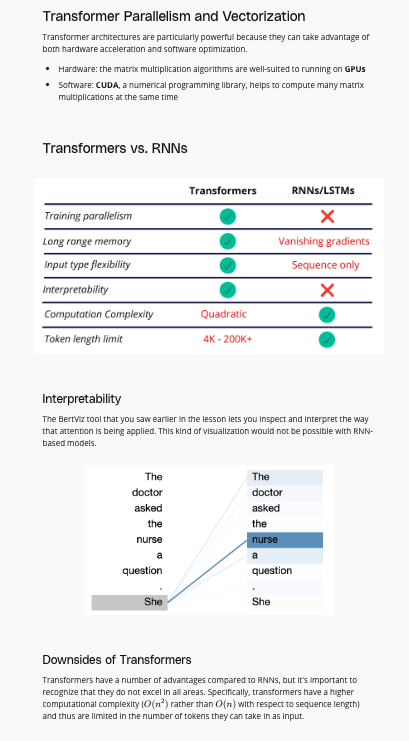 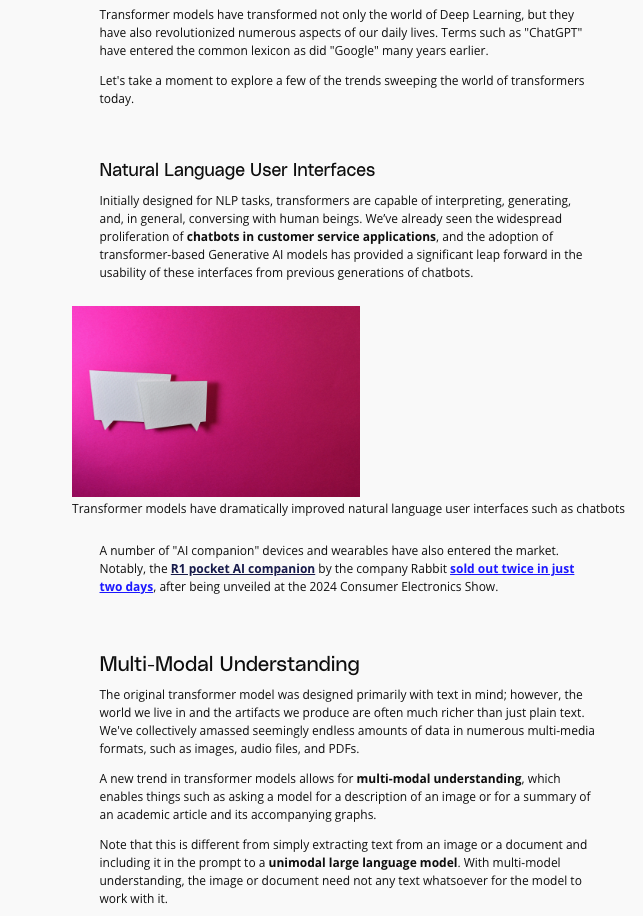

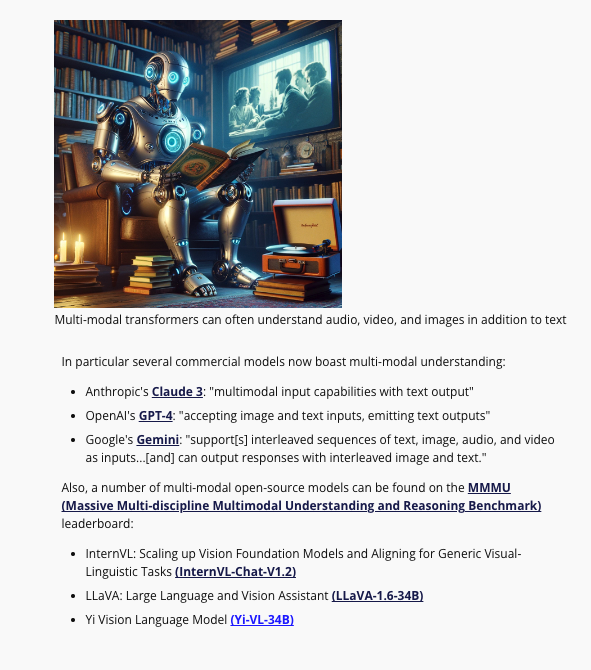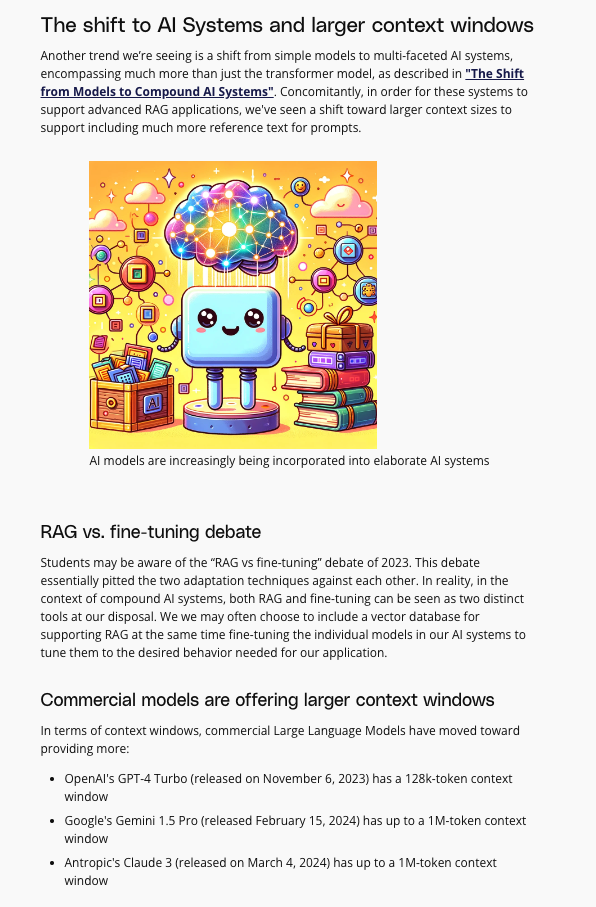

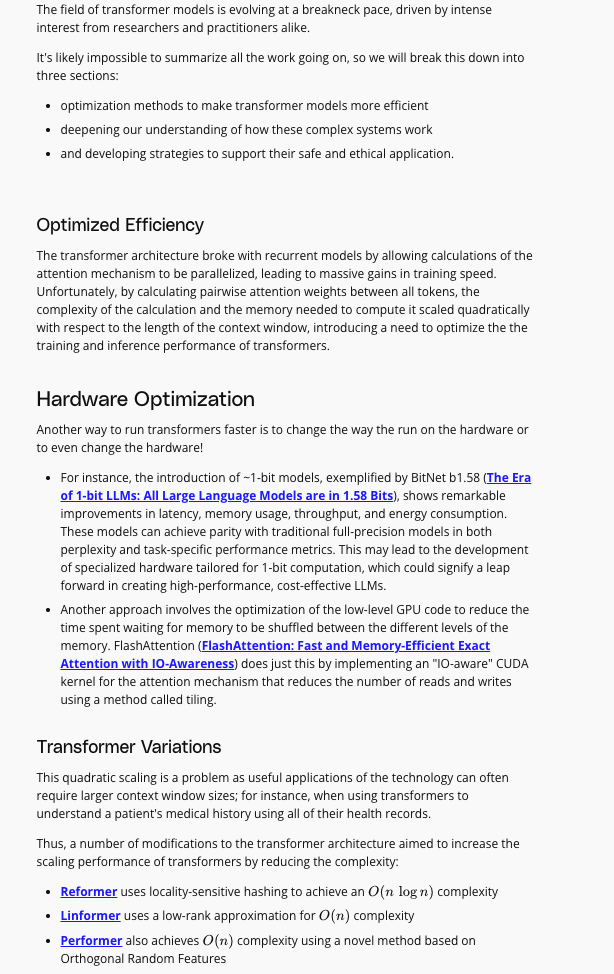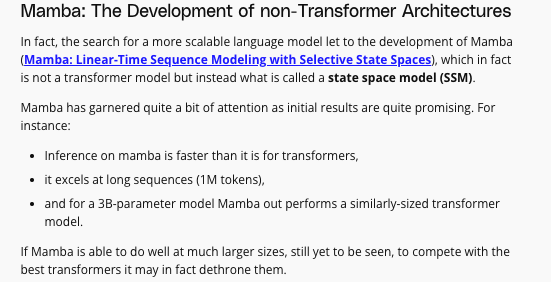 

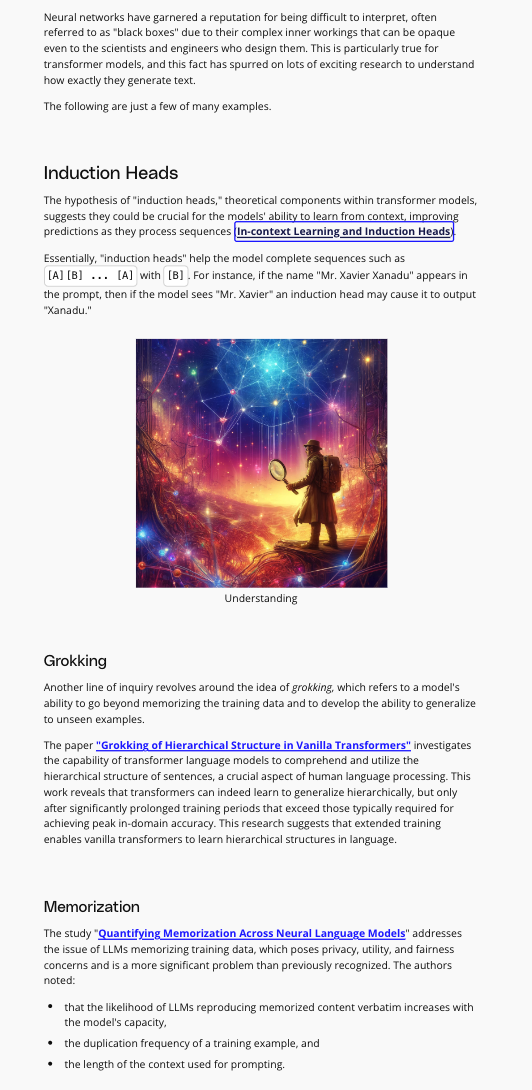 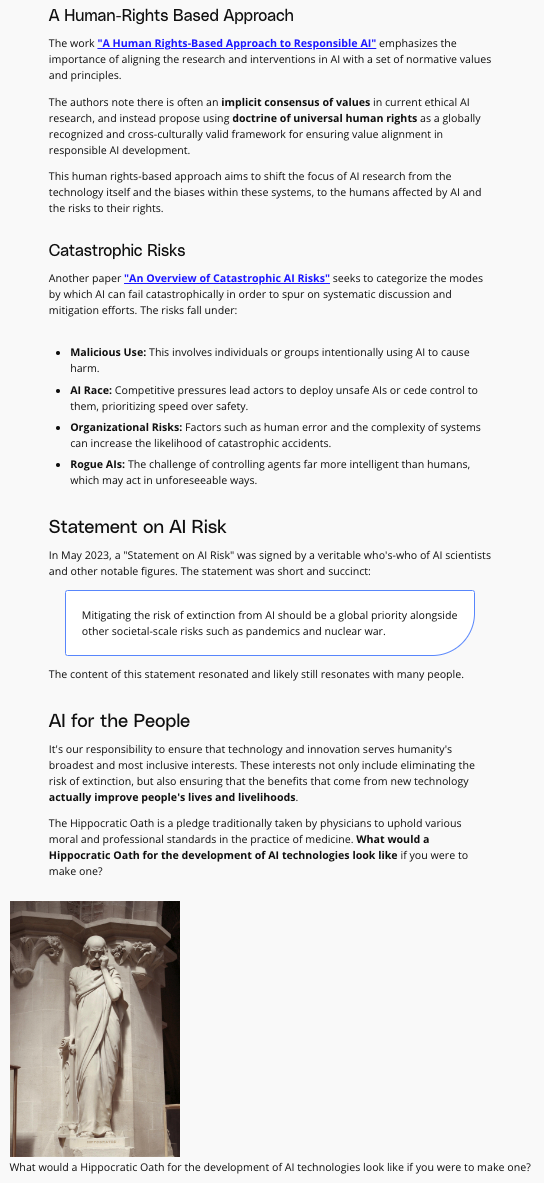

__THE AI HOPOCRATIC OATH__

As an AI practitioner, I pledge to uphold the highest ethical standards in my work, guided by principles that prioritize the well-being of humanity and the integrity of our profession. I will strive to develop and deploy AI technologies that benefit society, improve quality of life, and promote positive impacts while actively avoiding harm, injustice, and adverse effects. I commit to ensuring transparency in my work, making AI systems understandable and accessible to stakeholders, and taking full responsibility for their outcomes. I will design AI systems that are fair, unbiased, and inclusive, working diligently to prevent and mitigate biases in data and algorithms. Respecting the privacy and confidentiality of individuals is paramount, and I will ensure that AI systems adhere to data protection laws and ethical standards in handling personal information. I will prioritize human autonomy by creating AI systems that augment and enhance human decision-making, maintaining human oversight and control. Considering the environmental impact of AI technologies, I will strive to develop and deploy energy-efficient and sustainable solutions. Committing to continuous learning, I will stay informed about the latest advancements and ethical considerations in AI, seeking to improve the safety, robustness, and effectiveness of AI systems. I will collaborate with colleagues and stakeholders across disciplines to address complex challenges and share knowledge, promoting collective progress in the field. Above all, I will prioritize the public good and social responsibility in my work, contributing to the development of AI that aligns with societal values and ethical standards. Through this commitment, I aim to ensure that my contributions to AI are made with integrity, responsibility, and a dedication to the betterment of humanity.